Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL

,Unnamed: 0,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,1345,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,...,0,1,0,0,0,0,0,0,0,0
1,1346,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,...,0,1,0,0,0,0,0,0,0,0
2,1347,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,...,0,1,0,0,0,0,0,0,0,0
3,1348,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,...,0,1,0,0,0,0,0,0,0,0
4,1349,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,51303,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,...,0,0,0,0,0,0,0,0,0,0
35076,51305,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,...,0,0,0,0,0,0,0,0,0,0
35077,51307,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,...,0,0,0,0,0,0,0,0,0,0
35078,51309,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,hasParkingSpace,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,0,...,0,1,0,0,0,0,0,0,0,0
2,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,0,...,0,1,0,0,0,0,0,0,0,0
3,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,0,...,0,0,0,0,0,0,0,0,0,0
35076,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,1,...,0,0,0,0,0,0,0,0,0,0
35077,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,0,...,0,0,0,0,0,0,0,0,0,0
35078,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_dataset = data_ALL.sample(frac=0.8, random_state=0)
test_dataset = data_ALL.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [5]:
#sns.pairplot(train_dataset[['price', 'floor', 'squareMeters', 'centreDistance']], diag_kind='kde')

In [6]:
train_features = tf.convert_to_tensor(train_features)
test_features = tf.convert_to_tensor(test_features)

In [12]:
model = models.Sequential(
[
    layers.Dense(32, activation='relu'),
    layers.Dense(units=1)
])
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['accuracy'])

In [14]:
history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    validation_split = 0.15)

Epoch 1/100
746/746 [==============================] - 1s 1ms/step - loss: 94439.1797 - accuracy: 0.0000e+00 - val_loss: 92011.3438 - val_accuracy: 0.0000e+00
Epoch 2/100
746/746 [==============================] - 1s 1ms/step - loss: 94402.4453 - accuracy: 0.0000e+00 - val_loss: 92112.4141 - val_accuracy: 0.0000e+00
Epoch 3/100
746/746 [==============================] - 1s 1ms/step - loss: 94432.2422 - accuracy: 0.0000e+00 - val_loss: 92199.7031 - val_accuracy: 0.0000e+00
Epoch 4/100
746/746 [==============================] - 1s 1ms/step - loss: 94429.4219 - accuracy: 0.0000e+00 - val_loss: 92365.7734 - val_accuracy: 0.0000e+00
Epoch 5/100
746/746 [==============================] - 1s 1ms/step - loss: 94418.4297 - accuracy: 0.0000e+00 - val_loss: 91998.0234 - val_accuracy: 0.0000e+00
Epoch 6/100
746/746 [==============================] - 1s 1ms/step - loss: 94423.3047 - accuracy: 0.0000e+00 - val_loss: 91940.3828 - val_accuracy: 0.0000e+00
Epoch 7/100
746/746 [=========================

746/746 [==============================] - 1s 1ms/step - loss: 94097.1641 - accuracy: 0.0000e+00 - val_loss: 91644.5312 - val_accuracy: 0.0000e+00
Epoch 53/100
746/746 [==============================] - 1s 1ms/step - loss: 94035.5391 - accuracy: 0.0000e+00 - val_loss: 91761.5312 - val_accuracy: 0.0000e+00
Epoch 54/100
746/746 [==============================] - 1s 1ms/step - loss: 94085.4062 - accuracy: 0.0000e+00 - val_loss: 92055.4609 - val_accuracy: 0.0000e+00
Epoch 55/100
746/746 [==============================] - 1s 1ms/step - loss: 94061.1094 - accuracy: 0.0000e+00 - val_loss: 91776.7031 - val_accuracy: 0.0000e+00
Epoch 56/100
746/746 [==============================] - 1s 1ms/step - loss: 94051.5312 - accuracy: 0.0000e+00 - val_loss: 91684.6953 - val_accuracy: 0.0000e+00
Epoch 57/100
746/746 [==============================] - 1s 1ms/step - loss: 94054.5078 - accuracy: 0.0000e+00 - val_loss: 91628.4297 - val_accuracy: 0.0000e+00
Epoch 58/100
746/746 [==============================]

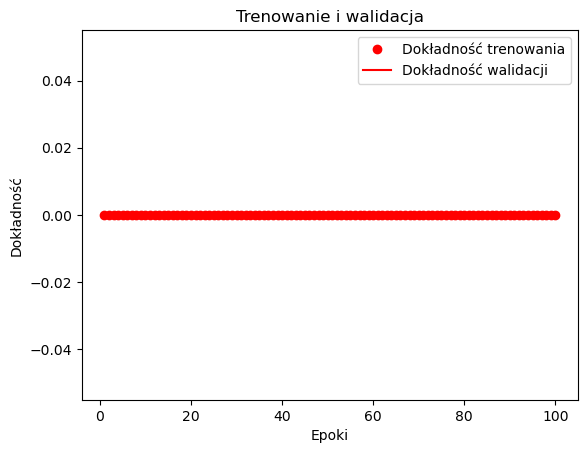

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Dokładność trenowania')
plt.plot(epochs, val_acc, 'r', label='Dokładność walidacji')
plt.title('Trenowanie i walidacja')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

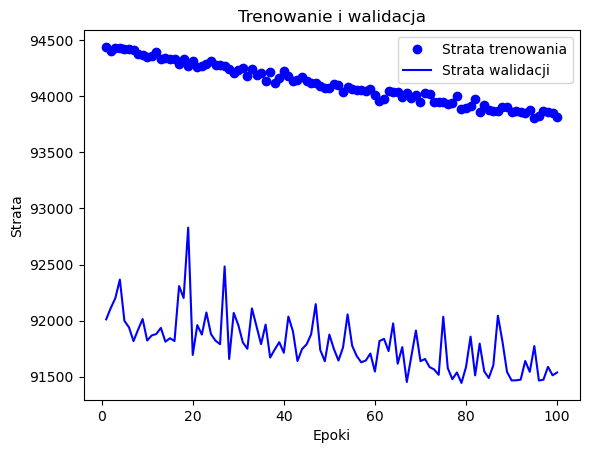

In [22]:
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Trenowanie i walidacja')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

In [20]:
score = model.evaluate(test_features, test_labels)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

220/220 [==============================] - 0s 825us/step - loss: 95132.3047 - accuracy: 0.0000e+00
Test loss:  95132.3046875
Test accuracy:  0.0
